CS302(AI)
AI-VISIONARY

Develop a 10-armed bandit in which all ten mean-rewards start out equal and then take independent random walks (by adding a normally distributed increment with mean zero and standard deviation 0.01 to all mean-rewards on each time step). 
{function [value] = bandit_nonstat(action)}


In [4]:
import numpy as np

class NonStationaryBandit:
    def __init__(self, num_arms=10, std_dev=0.01):
        # Set the number of arms and the standard deviation of the random walks
        self.num_arms = num_arms
        self.std_dev = std_dev
        
        # Initialize the mean rewards for each arm to zero
        self.mean_rewards = np.zeros(num_arms)
        
    def get_reward(self, action):
        # Update the mean rewards for each arm with a random walk
        self.mean_rewards += np.random.normal(0, self.std_dev, self.num_arms)
        
        # Return a normally-distributed reward with mean equal to the mean reward for the chosen arm
        return np.random.normal(self.mean_rewards[action], 1)


In [5]:
# Create a non-stationary 10-armed bandit
bandit = NonStationaryBandit()

# Play the bandit and obtain a reward for the first action (arm 0)
reward = bandit.get_reward(0)

# Print the reward obtained
print(reward)


1.4496128089021698


Average reward for play 100: 29.90
Average reward for play 200: 58.29
Average reward for play 300: 86.06
Average reward for play 400: 113.63
Average reward for play 500: 142.49
Average reward for play 600: 169.98
Average reward for play 700: 200.20
Average reward for play 800: 228.86
Average reward for play 900: 257.38
Average reward for play 1000: 286.60
Average reward for play 1100: 316.91
Average reward for play 1200: 346.81
Average reward for play 1300: 375.49
Average reward for play 1400: 403.86
Average reward for play 1500: 432.33
Average reward for play 1600: 460.53
Average reward for play 1700: 489.20
Average reward for play 1800: 517.63
Average reward for play 1900: 547.08
Average reward for play 2000: 574.24


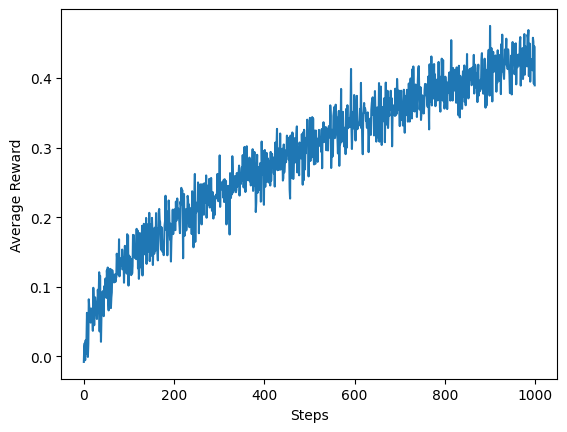

In [6]:
import matplotlib.pyplot as plt

# Create a non-stationary 10-armed bandit
bandit = NonStationaryBandit()

# Set the number of plays and the number of steps per play
num_plays = 2000
steps_per_play = 1000

# Initialize arrays to store the total reward obtained and the number of times each arm is chosen
total_reward = np.zeros(steps_per_play)
num_chosen = np.zeros(bandit.num_arms)

# Loop over each play and each step within each play
for i in range(num_plays):
    for j in range(steps_per_play):
        # Choose an action using an epsilon-greedy strategy
        epsilon = 0.1
        if np.random.random() < epsilon:
            action = np.random.randint(bandit.num_arms)
        else:
            action = np.argmax(bandit.mean_rewards)
        
        # Get the reward for the chosen action
        reward = bandit.get_reward(action)
        
        # Update the total reward and number of times each arm is chosen
        total_reward[j] += reward
        num_chosen[action] += 1
    
    # Print the average reward obtained over the last 1000 steps of the current play
    if (i+1) % 100 == 0:
        print(f"Average reward for play {i+1}: {np.mean(total_reward[-1000:]):.2f}")
    
    # Reset the mean rewards for each arm to zero for the next play
    bandit.mean_rewards = np.zeros(bandit.num_arms)

# Compute the average reward obtained for each step
avg_reward = total_reward / num_plays

# Plot the average reward obtained over time
plt.plot(avg_reward)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.show()
